### import libraries

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

#### Data Analysis

In [307]:
df = pd.read_excel('default of credit card clients.xls',header=1)

In [308]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [310]:
df.shape

(30000, 25)

In [311]:
df.drop_duplicates()
df.shape

(30000, 25)

#### There are no duplicates in our dataset

In [312]:
pd.set_option('display.max_columns', None)  

In [313]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

#### For some reason,i am not liking the column names as i have to check the data dictionary to see their names,so i am going to change the column names

In [314]:
df.columns =['id','limit_bal','sex','education','marriage','age',
  'sep_status','aug_status','jul_status','jun_status','may_status','apr_status',
  'sep_statement','aug_statement','jul_statement','jun_statement','may_statement','apr_statement',
  'sep_payment','aug_payment','jul_payment','jun_payment','may_payment','apr_payment',
  'default'
 ]

In [315]:
df.head()

,id,limit_bal,sex,education,marriage,age,sep_status,aug_status,jul_status,jun_status,may_status,apr_status,sep_statement,aug_statement,jul_statement,jun_statement,may_statement,apr_statement,sep_payment,aug_payment,jul_payment,jun_payment,may_payment,apr_payment,default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### On analyzing the data randomly,i see some data discrepancies in the way the data was collected.I have a slight confusion with the statement and payment columns monthwise and their corresponding monthwise status.
#### Before i summarize my understanding of the data, let me summarize my basic understanding of how credit card payments work.
#### Customer gets statement for the month(eg:August),and the customer has to pay this statement amount on the following month(eg:September),and if that month(eg:september) payment was done on time,then the payment status for september is paid duly.
#### i did try to understand the recording of month_status based on statement and payment column.
####          1.On most cases, the previous month statement and current month payment was paid exactly and the current month status was paid duly
####          2.In some cases,the previous month statement(eg:Aug) is high than the current month payment (eg:sept),but the current month(eg:sept) status is duly paid.So if the current month payment sufficies minimum balance to be paid,then it is deemed as paid duly? we dont have information about the minimum balance paid.so it will be hard to judge the case
#### With these understanding,I'am making an assumption that monthwise pay status will include all information about the customer statement and payment.So monthwise pay status will be using redudant information of statement of payment columns

#### Deafult will be our predictor variable.This variable will tell us whether the customer will deafult next month or not
#### Lets analyse the level counts of our predictor variable

In [316]:
default_rate =round(df['default'].value_counts()/len(df)*100,2)
default_rate

0    77.88
1    22.12
Name: default, dtype: float64

#### We are having a slightly imbalanced data set.Using accuracy as a metric wont be a good idea to this.We can use Precision/recall or F1 metric for this.

#### Lets analyze the data

In [317]:
df.describe()

,id,limit_bal,sex,education,marriage,age,sep_status,aug_status,jul_status,jun_status,may_status,apr_status,sep_statement,aug_statement,jul_statement,jun_statement,may_statement,apr_statement,sep_payment,aug_payment,jul_payment,jun_payment,may_payment,apr_payment,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
id               30000 non-null int64
limit_bal        30000 non-null int64
sex              30000 non-null int64
education        30000 non-null int64
marriage         30000 non-null int64
age              30000 non-null int64
sep_status       30000 non-null int64
aug_status       30000 non-null int64
jul_status       30000 non-null int64
jun_status       30000 non-null int64
may_status       30000 non-null int64
apr_status       30000 non-null int64
sep_statement    30000 non-null int64
aug_statement    30000 non-null int64
jul_statement    30000 non-null int64
jun_statement    30000 non-null int64
may_statement    30000 non-null int64
apr_statement    30000 non-null int64
sep_payment      30000 non-null int64
aug_payment      30000 non-null int64
jul_payment      30000 non-null int64
jun_payment      30000 non-null int64
may_payment      30000 non-null int64
apr_payment      

#### we are not dealing with a huge dataset but a decent size of data.So this will be good for our analysis

## univariate analysis
### In this stage we will analyse variables one by one

#### analysing the categorical variables

In [318]:
df[['sex','education','marriage']].describe()


,sex,education,marriage
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [319]:
df['education'].value_counts().sort_index()

0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: education, dtype: int64

#### As per docuementation,education has only 1,2,3,4 levels of data,but we can see that it has 0,5,6 as additional levels.
#### We may need to perform some data cleaning.We can do that in later stage.

In [320]:
df['marriage'].value_counts().sort_index()

0       54
1    13659
2    15964
3      323
Name: marriage, dtype: int64

#### As per docuementation,marriage has only 1,2,3 levels of data,but we can see that it has 0 as additional level.
#### We may need to perform some data cleaning.We can do that in later stage.

In [321]:
df['sep_status'].value_counts().sort_index()

-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: sep_status, dtype: int64

#### As per docuementation,sept repayment status has only -1 and 1-8 levels of data,but we can see that it has 0 and -2 as additional level.¶
#### We may need to perform some data cleaning.We can do that in later stage.This makes me skeptical about other month status as well.Lets analyse it further.

In [124]:
df[['aug_status','jul_status','jun_status','may_status','apr_status']].describe()

,aug_status,jul_status,jun_status,may_status,apr_status
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000


### From the above statistics,it seems that all the repayment status has extra two levels(0,-2) in them.We need to analyze further in data cleaning and fix these.

#### Lets analyze the numerical variables

In [323]:
def draw_histograms(df,col_name,bin_num):
    %pylab inline
    pylab.rcParams['figure.figsize'] = (10, 4)
    sns.distplot(df[col_name],bins=bin_num)
    plt.xlabel(col_name,fontsize=20)
    plt.show()

Populating the interactive namespace from numpy and matplotlib


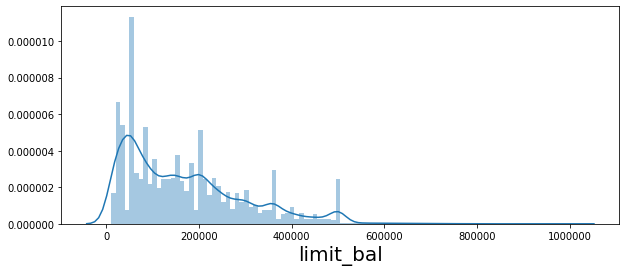

In [324]:
draw_histograms(df,'limit_bal',100)


#### limit_bal is highly skewed towards the right and may have outliers.I do not think it may have data errors as the limit abalance is for individual or combined family.Some rich families may have 1M as credit limit.

Populating the interactive namespace from numpy and matplotlib


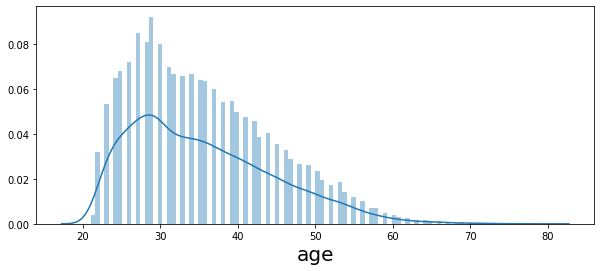

In [325]:
draw_histograms(df,'age',100)

#### Age is also right skewed

Populating the interactive namespace from numpy and matplotlib


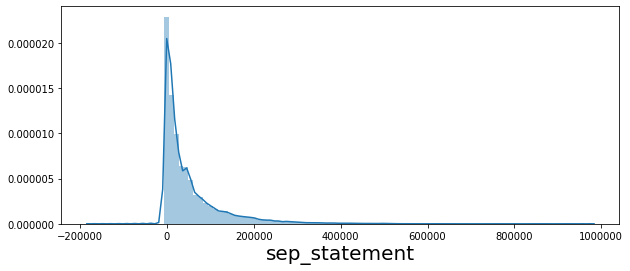

In [326]:
draw_histograms(df,'sep_statement',100)

Populating the interactive namespace from numpy and matplotlib


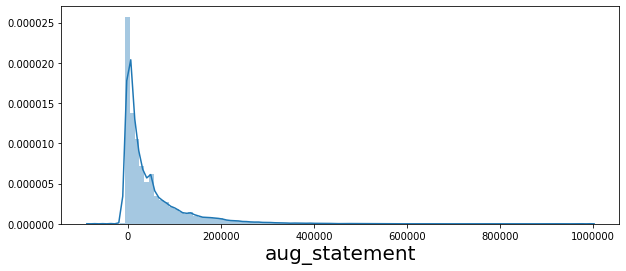

In [327]:
draw_histograms(df,'aug_statement',100)

Populating the interactive namespace from numpy and matplotlib


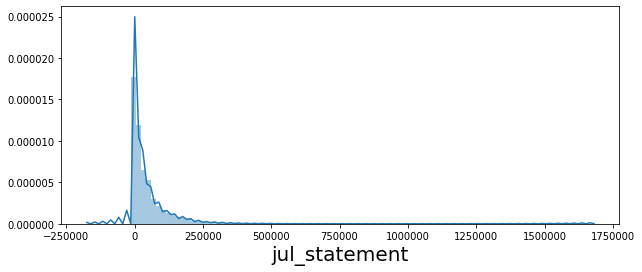

In [328]:
draw_histograms(df,'jul_statement',100)

Populating the interactive namespace from numpy and matplotlib


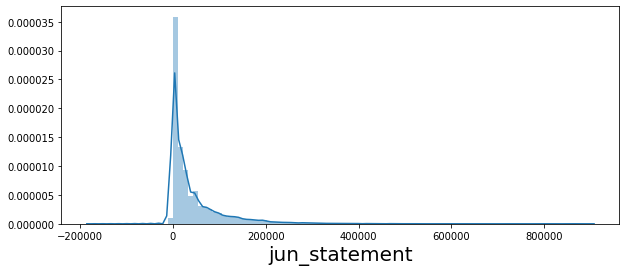

In [330]:
draw_histograms(df,'jun_statement',100)

Populating the interactive namespace from numpy and matplotlib


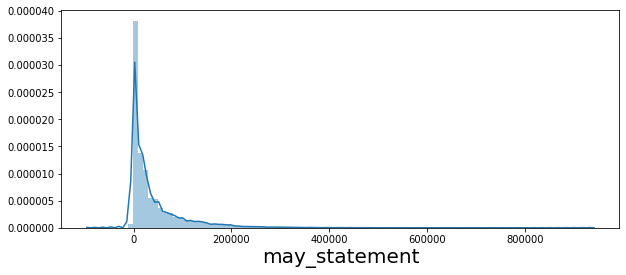

In [331]:
draw_histograms(df,'may_statement',100)

Populating the interactive namespace from numpy and matplotlib


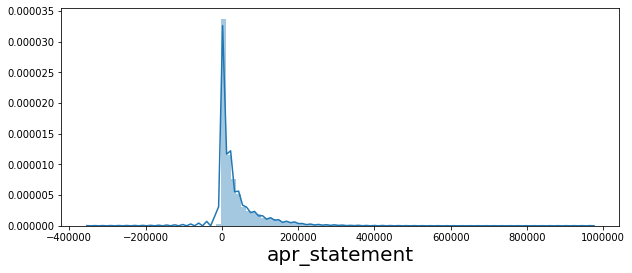

In [332]:
draw_histograms(df,'apr_statement',100)

#### All the monthwise payments were right skewed

Populating the interactive namespace from numpy and matplotlib


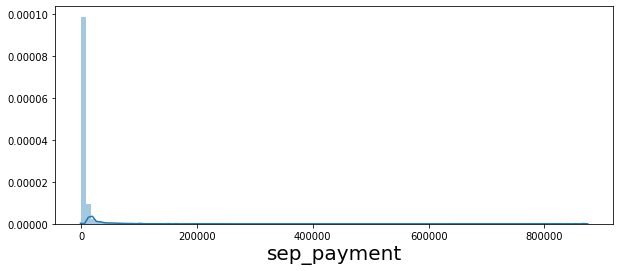

In [334]:
draw_histograms(df,'sep_payment',100)

Populating the interactive namespace from numpy and matplotlib


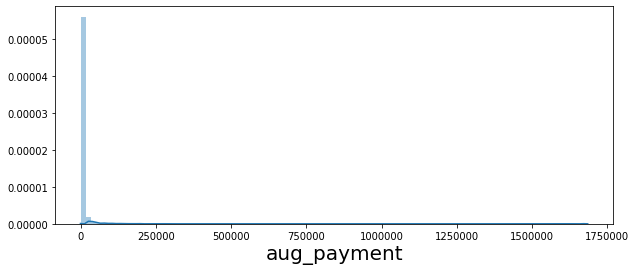

In [335]:
draw_histograms(df,'aug_payment',100)

Populating the interactive namespace from numpy and matplotlib


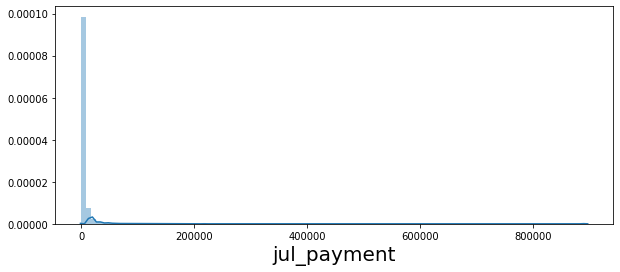

In [336]:
draw_histograms(df,'jul_payment',100)

Populating the interactive namespace from numpy and matplotlib


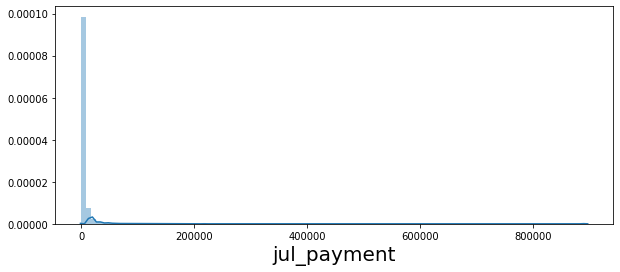

In [337]:
draw_histograms(df,'jul_payment',100)

Populating the interactive namespace from numpy and matplotlib


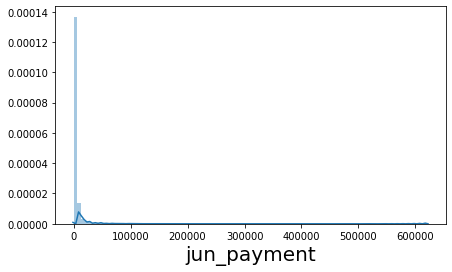

In [139]:
draw_histograms(df,'jun_payment',100)

Populating the interactive namespace from numpy and matplotlib


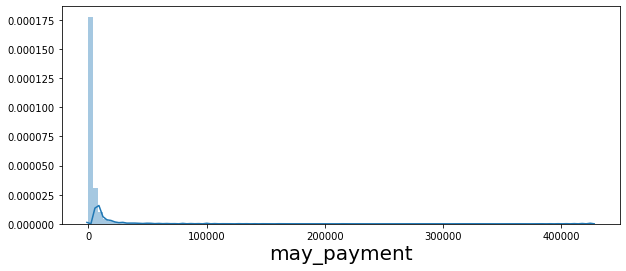

In [338]:
draw_histograms(df,'may_payment',100)

Populating the interactive namespace from numpy and matplotlib


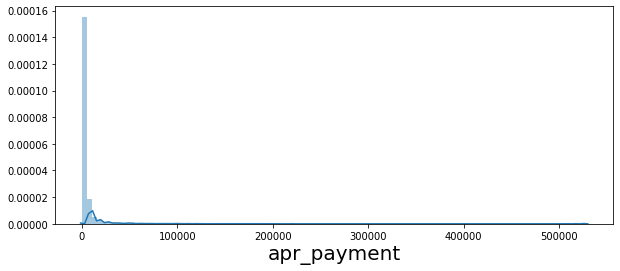

In [339]:
draw_histograms(df,'apr_payment',100)

#### Surprisingly,The payments were heavily right skewed than the statement.So more customers are paying less than their statement amount?

#### Next,we will use boxplot to analyze the outlier in each numerical columns

Text(0.5, 0, 'Limit Balance')

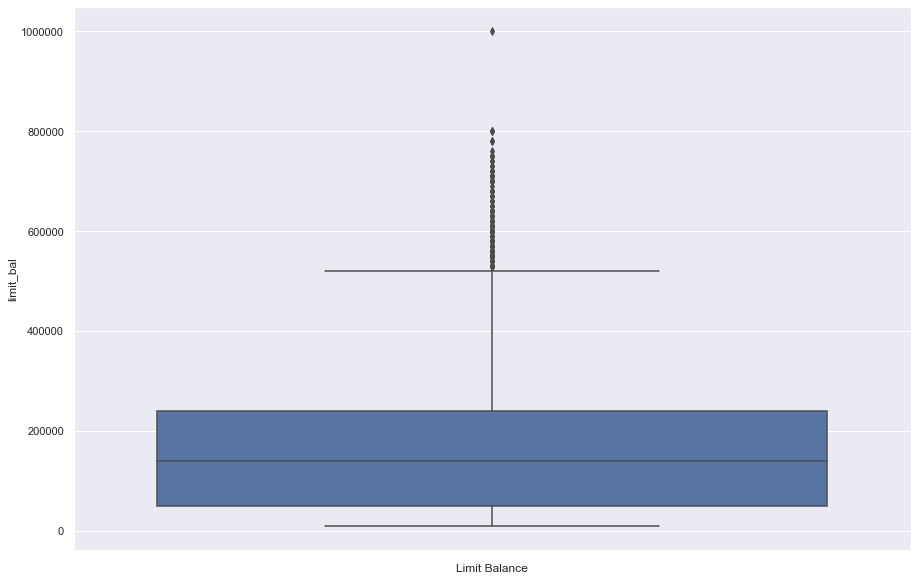

In [357]:
sns.boxplot(data=df,y='limit_bal')
plt.xlabel('Limit Balance')

#### One of the customers is a clear outlier,we will deal with outlier in the data cleaning section

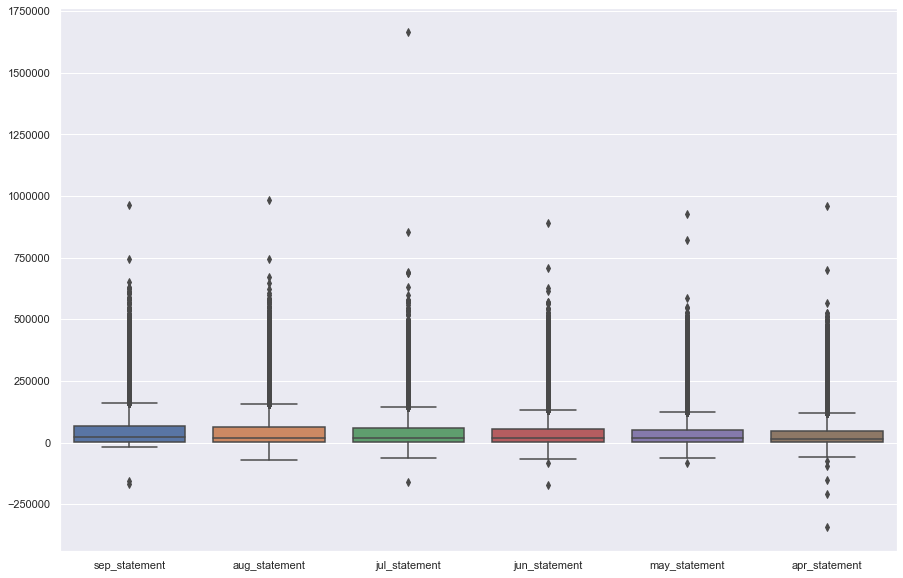

In [359]:
statement_list = ['sep_statement','aug_statement','jul_statement','jun_statement','may_statement','apr_statement']
sns.boxplot(data=df[statement_list])


#### We can see from the boxplot,that the monthwise statement has many outliers in them.Its obvious as the data was right skewed

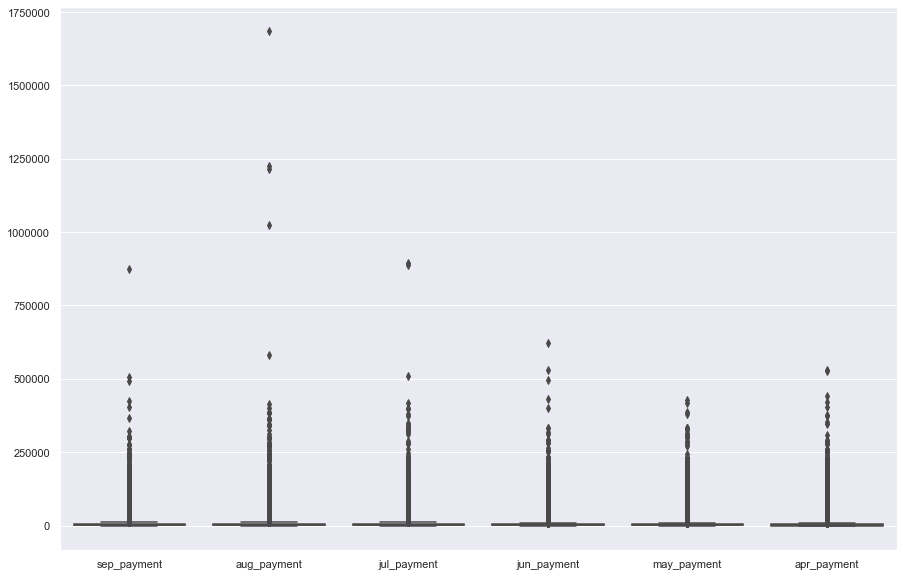

In [362]:
payment_list = ['sep_payment','aug_payment','jul_payment','jun_payment','may_payment','apr_payment']
sns.boxplot(data= df[payment_list])


#### We can see from the boxplot,that the monthwise payment has many outliers in them.Its obvious as the data was right skewed

Text(0.5, 0, 'Age')

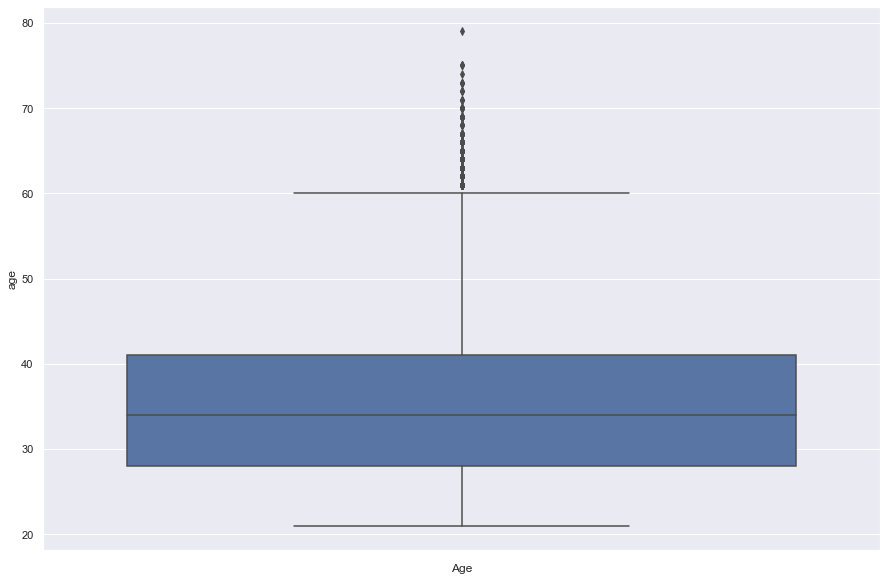

In [363]:
sns.boxplot(data=df,y='age')
plt.xlabel('Age')

#### Age has very less outliers compared to the other numerical columns

### Bivariate Analysis

In [44]:
numerical_df = df[['age',
  'sept_status','aug_status','jul_status','jun_status','may_status','apr_status',
  'sept_statement','aug_statement','jul_statement','jun_statement','may_statement','apr_statement',
  'sep_payment','aug_payment','jul_payment','jun_payment','may_payment','apr_payment']]

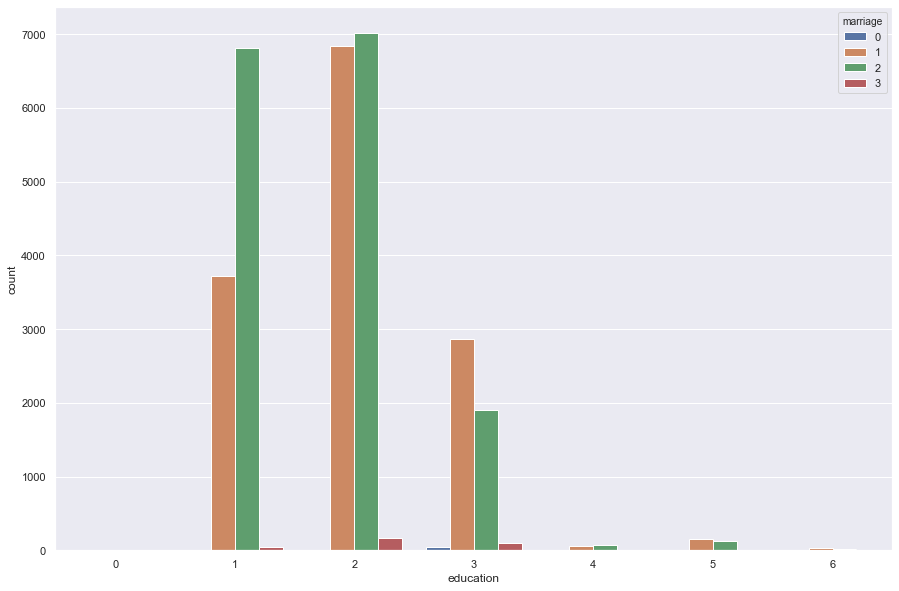

In [367]:
sns.countplot(df['education'],hue=df['marriage'])

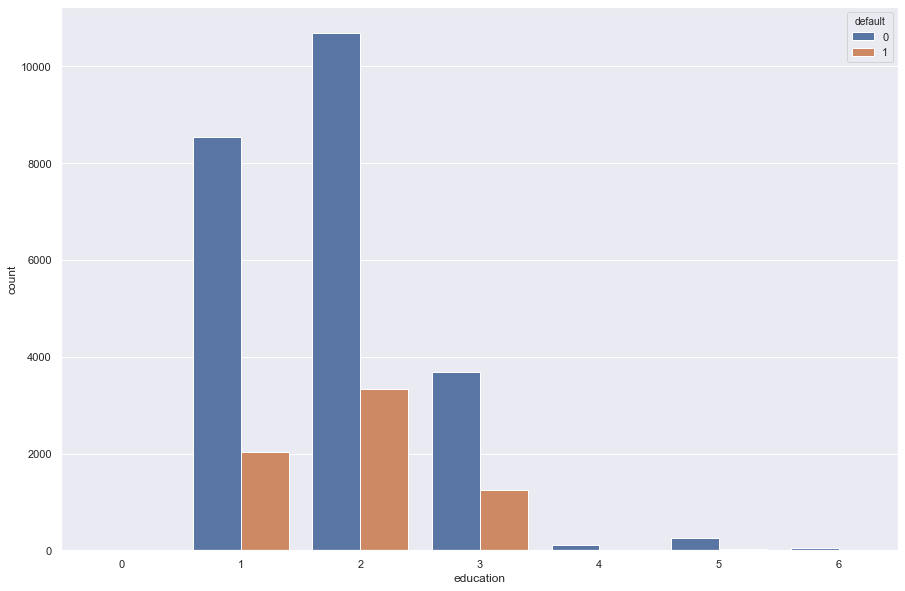

<Figure size 720x432 with 0 Axes>

In [366]:
sns.countplot(df['education'],hue=df['default'])
plt.figure(figsize=(10,6))
plt.show()

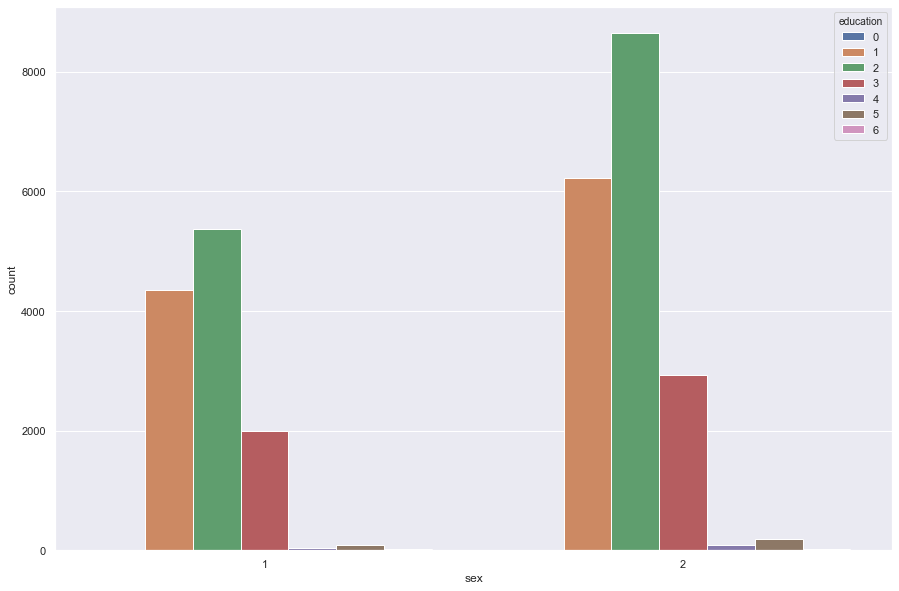

In [368]:
sns.countplot(data=df,x='sex',hue='education')

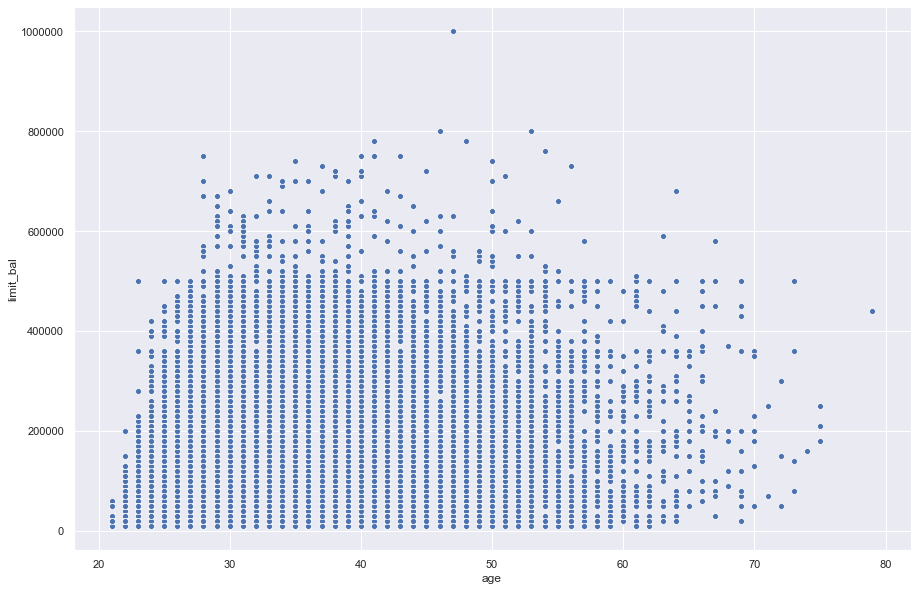

In [370]:
sns.scatterplot(data=df,x='age',y='limit_bal')

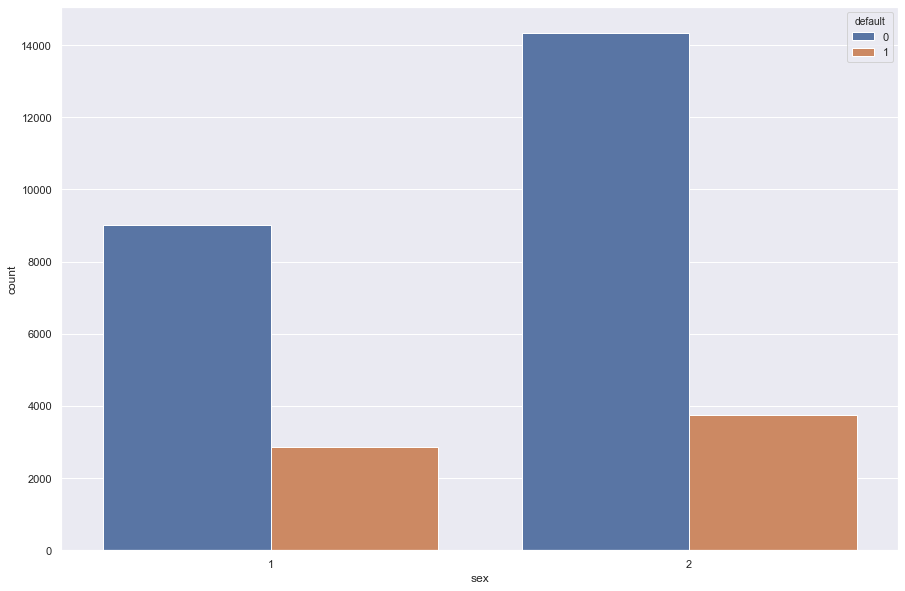

In [379]:
sns.countplot(data=new_df,x='sex',hue='default')

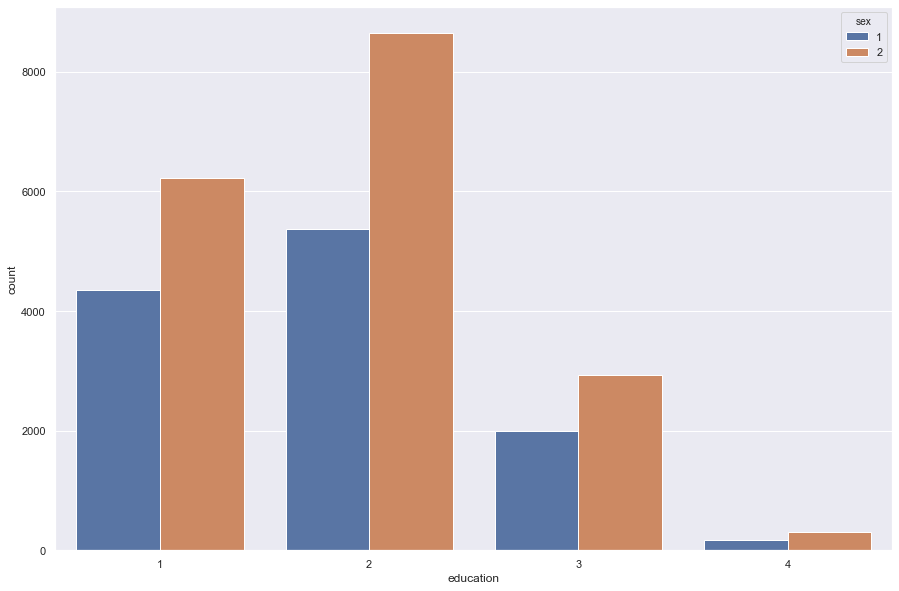

In [380]:
sns.countplot(data=new_df,x='education',hue='sex')

#### There is no corelation between Age and limit_balance as there is no pattern

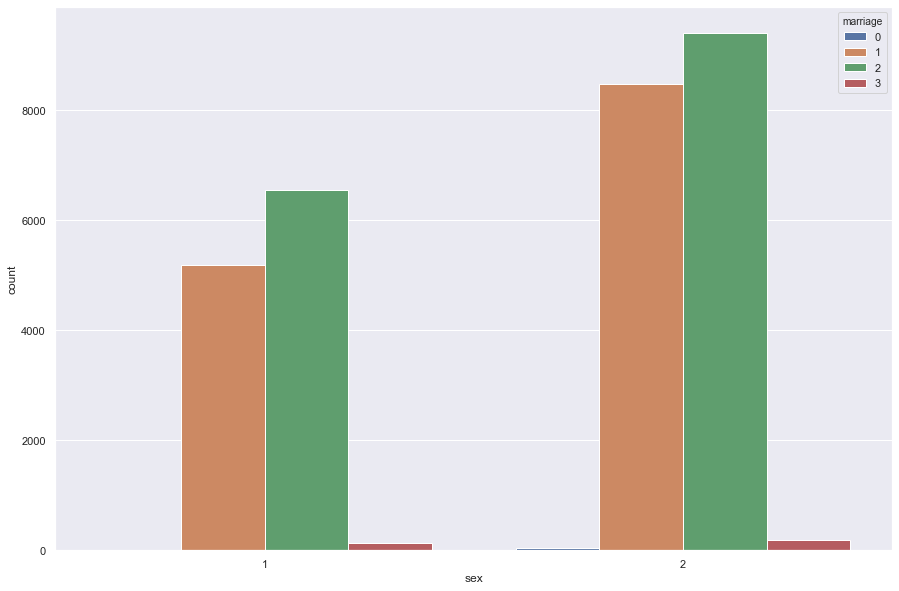

In [371]:
sns.countplot(data=df,x='sex',hue='marriage')

### Data Cleaning

#### As we seen previously,some categorical variables need some data cleaning.
####  First we will work education,we do not know what the levels 5,6 and 0 so,we are going to combine these levels to level 4,which is denotes as others

In [372]:
fil = (df.education == 5) | (df.education == 6) | (df.education == 0)
df.loc[fil, 'education'] = 4
df.education.value_counts()

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64

####  Now we will work on marriage column,we do not know what the levels  0 means,so we are going to combine these level to level 3,which denotes as others

In [373]:
df.loc[df.marriage == 0, 'marriage'] = 3
df.marriage.value_counts()

2    15964
1    13659
3      377
Name: marriage, dtype: int64

#### Next,we can concentrate on status columns for each month.If you notice ,the document dictionary for pay status has levels -1,1-8.but we can see additional -2 and 0 levels

#### If we see carefully,-1 denotes pay duly according to data dictionary,but it is less in count than 0.I am assuming that 0 denotes pay duly and -2 and -1 must be an error.So I am changing these levels to 0

In [374]:
df['sep_status'].value_counts().sort_index()

-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: sep_status, dtype: int64

In [375]:
fil = (df.sep_status == -2) | (df.sep_status == -1) | (df.sep_status == 0)
df.loc[fil, 'sep_status'] = 0
fil = (df.aug_status == -2) | (df.aug_status == -1) | (df.aug_status == 0)
df.loc[fil, 'aug_status'] = 0
fil = (df.jul_status == -2) | (df.jul_status == -1) | (df.jul_status == 0)
df.loc[fil, 'jul_status'] = 0
fil = (df.jun_status == -2) | (df.jun_status == -1) | (df.jun_status == 0)
df.loc[fil, 'jun_status'] = 0
fil = (df.may_status == -2) | (df.may_status == -1) | (df.may_status == 0)
df.loc[fil, 'may_status'] = 0
fil = (df.apr_status == -2) | (df.apr_status == -1) | (df.apr_status == 0)
df.loc[fil, 'apr_status'] = 0

In [376]:
df['sep_status'].value_counts().sort_index()

0    23182
1     3688
2     2667
3      322
4       76
5       26
6       11
7        9
8       19
Name: sep_status, dtype: int64

In [377]:
df.isnull().sum()

id               0
limit_bal        0
sex              0
education        0
marriage         0
age              0
sep_status       0
aug_status       0
jul_status       0
jun_status       0
may_status       0
apr_status       0
sep_statement    0
aug_statement    0
jul_statement    0
jun_statement    0
may_statement    0
apr_statement    0
sep_payment      0
aug_payment      0
jul_payment      0
jun_payment      0
may_payment      0
apr_payment      0
default          0
dtype: int64

#### There is no null value in the data set

In [378]:
new_df = df.drop(columns='id')  ##Droping id as it is of no use to our anaylysis

In [293]:
new_df.head()

,limit_bal,sex,education,marriage,age,sep_status,aug_status,jul_status,jun_status,may_status,apr_status,sep_statement,aug_statement,jul_statement,jun_statement,may_statement,apr_statement,sep_payment,aug_payment,jul_payment,jun_payment,may_payment,apr_payment,default
0,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [225]:
new_df.sex.value_counts()

2    18112
1    11888
Name: sex, dtype: int64

#### Outlier Treatment

#### After seeing the boxplot for limit_bal ,i see that the there are many outliers as the data was right skewed,and there was an extreme outlier with 1M limit_bal.Iam removing that data point and tranforming the other data point through log transformation to handle outliers.

In [295]:
new_df = new_df[new_df['limit_bal']<=800000].reset_index(drop=True)

In [296]:
new_df['log_limit_bal'] = new_df['limit_bal'].transform(np.log)

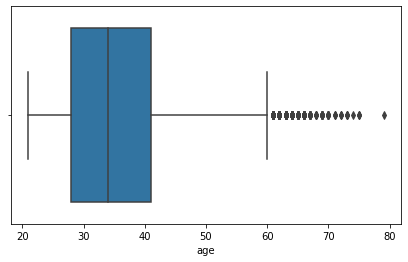

In [297]:
sns.boxplot(data=new_df,x='age')

In [298]:
new_df = new_df[new_df['age']<78].reset_index(drop=True)
new_df.shape

(29998, 25)

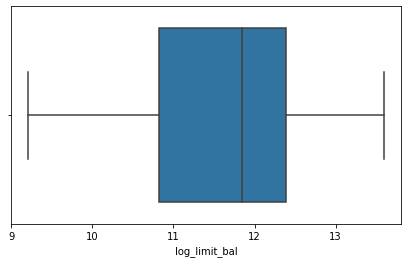

In [299]:
sns.boxplot(data=new_df,x='log_limit_bal')

In [300]:
new_df['log_age'] = new_df['age'].transform(np.log)


In [301]:
new_df['log_age'].describe()

count    29998.000000
mean         3.536933
std          0.251497
min          3.044522
25%          3.332205
50%          3.526361
75%          3.713572
max          4.317488
Name: log_age, dtype: float64

In [303]:
new_df = new_df[['log_limit_bal','log_age','sex','marriage','education','sep_status','aug_status','jul_status','jun_status','may_status','apr_status','default']]

#### As mentioned earlier,the monthwise status seems to contain information whether the customer paid the statement amount or not.Also,the payment and statement columns are heavily skewed,I realize they may be adding noise to the data.So I am dropping the payment and statement columns for our analysis.

In [304]:
new_df.head()

,log_limit_bal,log_age,sex,marriage,education,sep_status,aug_status,jul_status,jun_status,may_status,apr_status,default
0,9.903488,3.178054,2,1,2,2,2,0,0,0,0,1
1,11.695247,3.258097,2,2,2,0,2,0,0,0,2,1
2,11.407565,3.526361,2,2,2,0,0,0,0,0,0,0
3,10.819778,3.610918,2,1,2,0,0,0,0,0,0,0
4,10.819778,4.043051,1,1,2,0,0,0,0,0,0,0


In [305]:
new_df.to_excel(f"input_model.xlsx",index=False)

#### Writing our model input data so that this data can be readily input into different models